In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 4.2 MB/s eta 0:00:00


In [4]:
import pandas_datareader as pdr
key = "d3714db27b99121d6264b51aa3cc403791fad850"

In [5]:
print(pd.__version__)
print(pdr.__version__)

2.1.4
0.10.0


In [6]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=728061 sha256=087e129e273a02c3e463551e0e08595e1ca5365e048bb133ddee0799cebc0b59
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [96]:
import yfinance as yf

# Fetch historical market data for Apple (AAPL)
df = yf.download('TATAMOTORS.NS', start='1999-01-01', end='2024-09-20')

# Show the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1999-01-01  31.599886  32.155613  31.053738  31.839424  24.690235  18835718
1999-01-04  32.021473  32.663437  31.561560  31.676538  24.563919  18245781
1999-01-05  31.714865  34.215645  31.283695  34.215645  26.532898  38938718
1999-01-06  34.637230  35.317520  33.870708  35.221703  27.313057  40059886
1999-01-07  35.269611  36.850563  35.164215  36.697258  28.457291  35983032


In [97]:
df.to_csv('TATAMOTORS.NS.csv')

In [9]:
import pandas as pd

In [98]:
df=pd.read_csv('TATAMOTORS.NS.csv')

In [99]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-01,31.599886,32.155613,31.053738,31.839424,24.690235,18835718
1,1999-01-04,32.021473,32.663437,31.561560,31.676538,24.563919,18245781
2,1999-01-05,31.714865,34.215645,31.283695,34.215645,26.532898,38938718
3,1999-01-06,34.637230,35.317520,33.870708,35.221703,27.313057,40059886
4,1999-01-07,35.269611,36.850563,35.164215,36.697258,28.457291,35983032


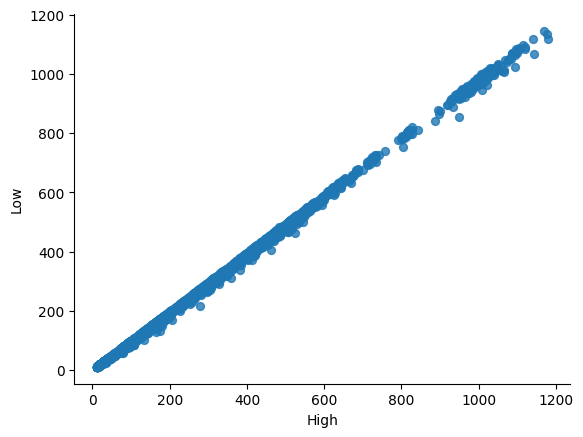

In [100]:
# @title High vs Low

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [101]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6426,2024-09-13,994.900024,1006.000000,988.000000,992.099976,992.099976,13203676
6427,2024-09-16,997.000000,999.900024,984.500000,988.400024,988.400024,5836274
6428,2024-09-17,995.000000,995.000000,960.000000,974.950012,974.950012,44516613
6429,2024-09-18,978.200012,983.700012,957.150024,962.049988,962.049988,12044431
6430,2024-09-19,970.400024,978.950012,956.349976,967.000000,967.000000,13466770


In [102]:
df1=df.reset_index()['Close']

In [103]:
df1

,Close
0,31.839424
1,31.676538
2,34.215645
3,35.221703
4,36.697258
...,...
6426,992.099976
6427,988.400024
6428,974.950012
6429,962.049988


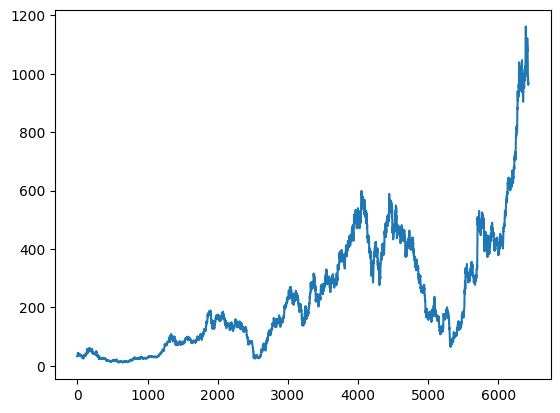

In [104]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
import numpy as np

In [105]:
df1

,Close
0,31.839424
1,31.676538
2,34.215645
3,35.221703
4,36.697258
...,...
6426,992.099976
6427,988.400024
6428,974.950012
6429,962.049988


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [107]:
print(df1)

[[0.01787925]
 [0.01773768]
 [0.01994448]
 ...
 [0.83756051]
 [0.82634878]
 [0.83065096]]


In [108]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [109]:
training_size,test_size

(4180, 2251)

In [110]:
train_data

array([[0.01787925],
       [0.01773768],
       [0.01994448],
       ...,
       [0.32382055],
       [0.32760125],
       [0.32112626]])

In [111]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [112]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [113]:
print(X_train.shape), print(y_train.shape)

(4079, 100)
(4079,)


(None, None)

In [114]:
print(X_test.shape), print(ytest.shape)

(2150, 100)
(2150,)


(None, None)

In [115]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [116]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
# from keras.layers import BatchNormalization

# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
# model.add(BatchNormalization())  # Add batch normalization
# model.add(LSTM(50, return_sequences=True))
# model.add(BatchNormalization())
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')


In [117]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [119]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
64/64 [==============================] - 15s 163ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2/100
64/64 [==============================] - 9s 146ms/step - loss: 1.2047e-04 - val_loss: 0.0011
Epoch 3/100
64/64 [==============================] - 10s 156ms/step - loss: 1.1104e-04 - val_loss: 9.6850e-04
Epoch 4/100
64/64 [==============================] - 10s 150ms/step - loss: 1.0266e-04 - val_loss: 0.0010
Epoch 5/100
64/64 [==============================] - 10s 155ms/step - loss: 1.0124e-04 - val_loss: 0.0013
Epoch 6/100
64/64 [==============================] - 10s 150ms/step - loss: 1.1935e-04 - val_loss: 8.4508e-04
Epoch 7/100
64/64 [==============================] - 10s 155ms/step - loss: 1.0295e-04 - val_loss: 8.5252e-04
Epoch 8/100
64/64 [==============================] - 10s 154ms/step - loss: 8.9545e-05 - val_loss: 8.2486e-04
Epoch 9/100
64/64 [==============================] - 10s 152ms/step - loss: 9.1915e-05 - val_loss: 6.2964e-04
Epoch 10/100
64/64 [===========

In [121]:
import tensorflow as tf

In [122]:
tf.__version__

'2.15.0'

In [123]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

68/68 [==============================] - 2s 31ms/step


In [124]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [125]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

203.94459559696392

In [126]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

460.70003015526714

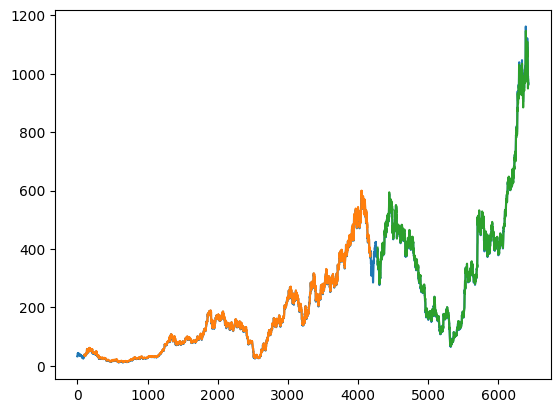

In [127]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [128]:
len(test_data)

2251

In [129]:
x_input=test_data[2151:].reshape(1,-1)
x_input.shape

(1, 100)

In [130]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [131]:
temp_input

[0.8588975302138874,
 0.8598535468151838,
 0.8661982038777428,
 0.8834938183888879,
 0.8709783929786203,
 0.873411933184173,
 0.8493805976672463,
 0.8698484876624729,
 0.8856666316165595,
 0.8998768089066523,
 0.8243497998939093,
 0.8286085350390248,
 0.8135291794106654,
 0.804055745566336,
 0.8121386001638348,
 0.8170056805749398,
 0.8137030150783187,
 0.8266095044318087,
 0.8250450895173247,
 0.8232633932800736,
 0.8137464607334325,
 0.810313405224272,
 0.793235125083092,
 0.7924094454471373,
 0.8162669452964108,
 0.7758091736066055,
 0.7984498768295039,
 0.8056636061359338,
 0.8336928967728972,
 0.8377343505952453,
 0.8481203553857573,
 0.8495109876797857,
 0.8470339487719215,
 0.8535958871572478,
 0.8470774474742331,
 0.8396463837978382,
 0.8404286177786789,
 0.8261314961311604,
 0.8228722762896531,
 0.8202214547613333,
 0.8174836888755881,
 0.8350834760197279,
 0.8504235586259682,
 0.8611137890966727,
 0.8430794393069987,
 0.8381689132407796,
 0.8577676779449377,
 0.85381316848001

In [132]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8257493]
101
1 day input [0.85985355 0.8661982  0.88349382 0.87097839 0.87341193 0.8493806
 0.86984849 0.88566663 0.89987681 0.8243498  0.82860854 0.81352918
 0.80405575 0.8121386  0.81700568 0.81370302 0.8266095  0.82504509
 0.82326339 0.81374646 0.81031341 0.79323513 0.79240945 0.81626695
 0.77580917 0.79844988 0.80566361 0.8336929  0.83773435 0.84812036
 0.84951099 0.84703395 0.85359589 0.84707745 0.83964638 0.84042862
 0.8261315  0.82287228 0.82022145 0.81748369 0.83508348 0.85042356
 0.86111379 0.84307944 0.83816891 0.85776768 0.85381317 0.8615918
 0.87232553 0.86411228 0.87740989 0.87388994 0.88058216 0.87771411
 0.88066916 0.85064084 0.86206986 0.86089651 0.88340682 0.938379
 0.96214966 0.96710363 1.         0.99548059 0.98483381 0.94333307
 0.87362921 0.87128257 0.88132101 0.89561807 0.9185195  0.925516
 0.9057868  0.91352203 0.94481054 0.93555434 0.9348591  0.93338153
 0.91882368 0.93333813 0.93963929 0.92647202 0.92412543 0.96506121
 0.95610917 0.93985657 0.93329463 0.9292

In [133]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [134]:
import matplotlib.pyplot as plt

In [135]:
len(df1)

6431

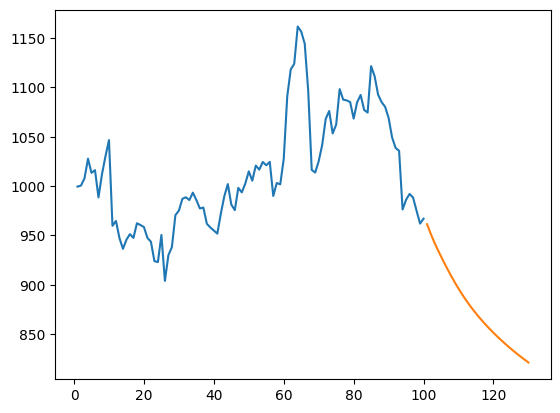

In [136]:
plt.plot(day_new,scaler.inverse_transform(df1[6331:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

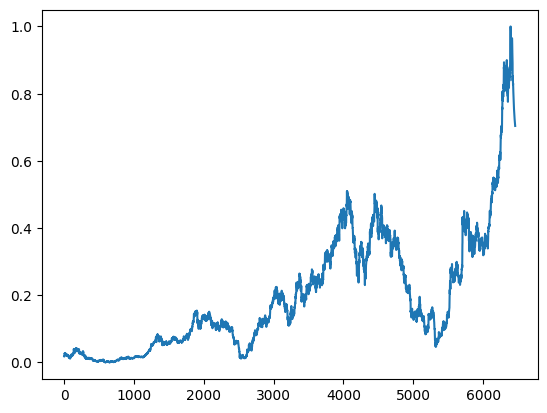

In [137]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [138]:
df3=scaler.inverse_transform(df3).tolist()

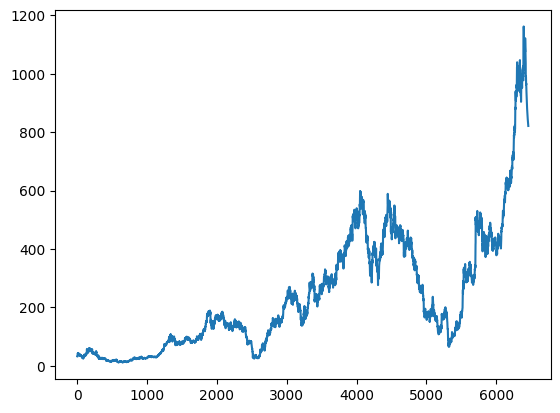

In [139]:
plt.plot(df3)

In [140]:
import joblib

# Assuming you have a trained model named `model`
# Save the model to a file
joblib.dump(model, 'Stock_Price_Predication_Tata_motors.pkl')

print("Model saved successfully.")


Model saved successfully.
